Toy model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
s=[1,2,-1,-2]# saisonnalités
t0=17 # coupure
T=24 # longueur série
a=3 # coeff linéaire première période
b=-2 # coeff linéaire deuxième période
#d=1
c=(a-b)*t0 # coefficient constant ordonnee en t0
sig=2 # variance loi normale

Y=[]
for t in range(T):
    if t>t0:
        Y.insert(t,b*t+c+s[t%4]+sig*np.random.randn(1))
    else:
        Y.insert(t,a*t+s[t%4]+sig*np.random.randn(1))
    

X=np.hstack([np.arange(24).reshape(-1,1),np.concatenate(([np.eye(4) for i in range(6)]))])
alpha=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
res=Y-np.dot(X,alpha)
if res[0]<0 and res[-1]<0:
    tO=np.argmax(res)
if res[0]>0 and res[-1]>0:
    tO=np.argmin(res)
tO

17

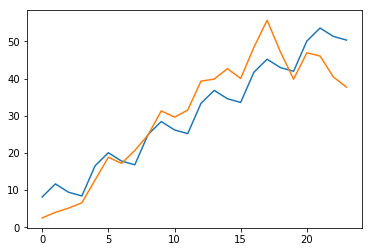

In [2]:
plt.plot(np.dot(X,alpha))
plt.plot(Y)
plt.show()

In [25]:
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2=1-SCE/SCT
print(R2)

0.833673572769


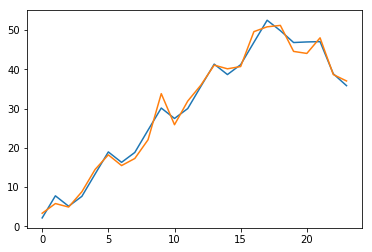

In [44]:
import matplotlib.pyplot as plt
first_col=np.vstack([np.arange(tO).reshape(-1,1),tO*np.ones(T-tO).reshape(-1,1)])
second_col=np.vstack([np.zeros(tO).reshape(-1,1),(np.arange(tO,T)-tO).reshape(-1,1)])
X=np.hstack([first_col,second_col,np.concatenate(([np.eye(4) for i in range(6)]))])
alpha=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
res=Y-np.dot(X,alpha)
plt.plot(np.dot(X,alpha))
plt.plot(Y)
plt.show()

In [27]:
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2=1-SCE/SCT
print(R2)

0.974540918836


In [23]:
alpha, [a,b,s]

(array([[ 3.04011359],
        [ 0.51119596],
        [ 1.57864682],
        [ 3.05506797],
        [-0.42859795],
        [-1.38593101]]), [3, 0.5, [1, 2, -1, -2]])

In [2]:
import pandas as pd
import numpy as np
commande_par_mois = pd.ExcelFile('D:/Commandes toner drop/commandes_by_month.xlsx')
commandes = commande_par_mois.parse()
all_ref=commandes.groupby('reference')['reference'].count().index
ref_12=commandes.groupby('reference')['reference'].count().index[(commandes.groupby('reference')['reference'].count()>12).values]

In [14]:
len(ref_12)

222

In [4]:
liste=np.random.choice(ref_12,10)

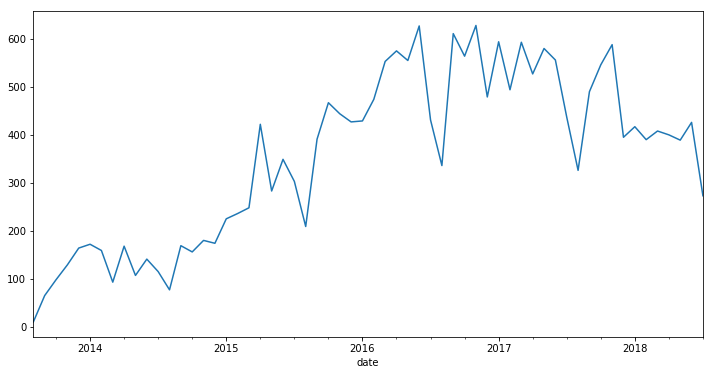

In [13]:
df=commandes[commandes['reference']=='6AJ00000113']
commandes1=pd.Series(df['quantites'].values,pd.to_datetime(df['date']))
commandes1=commandes1.sort_index()
commandes1[:-1].plot(figsize=(12,6),label=i)
plt.show()

6AK00000047


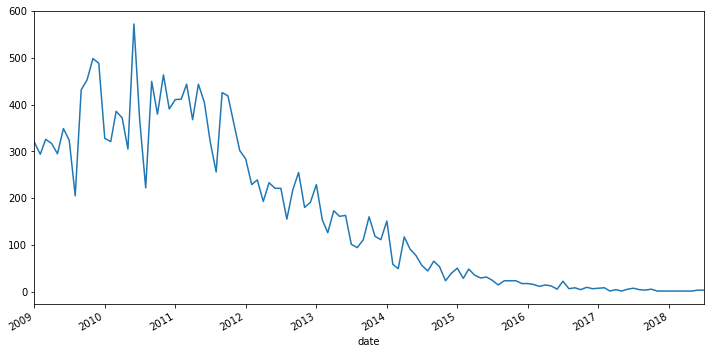

6A000001612


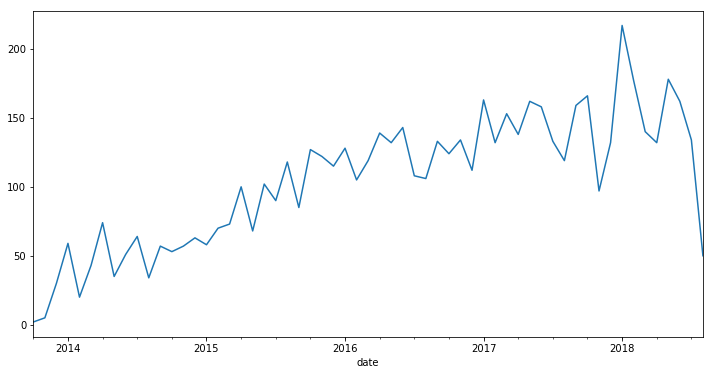

6AJ00000139


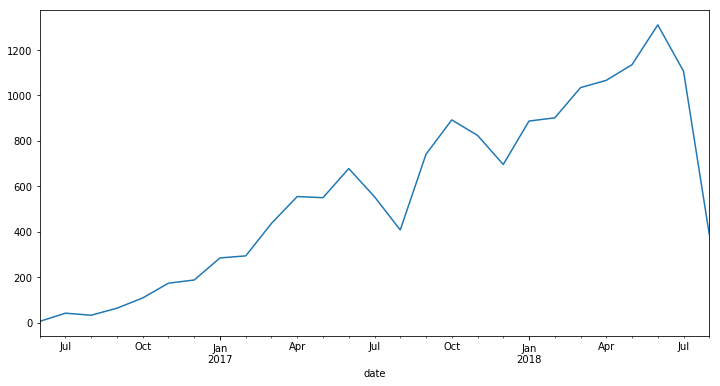

6BC02231550


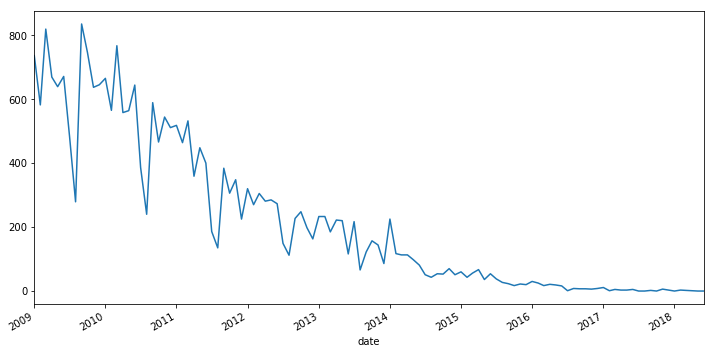

22569346


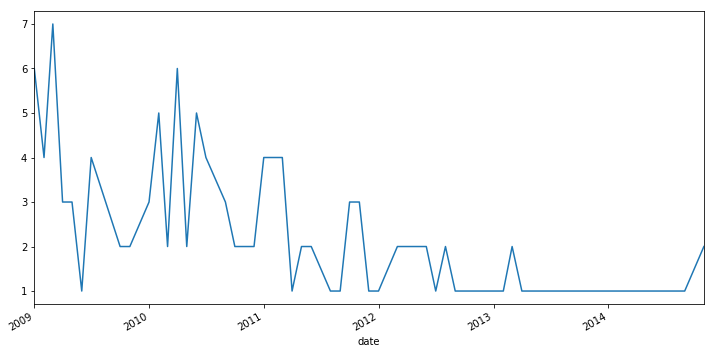

21204095


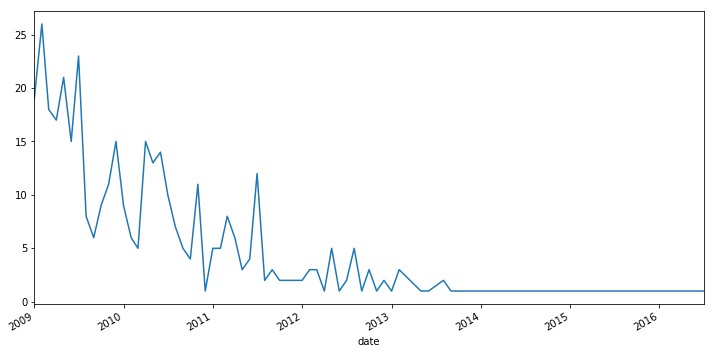

6AJ00000112


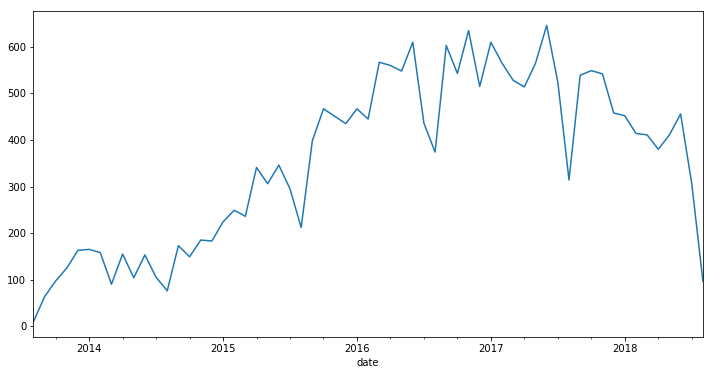

6B000000756


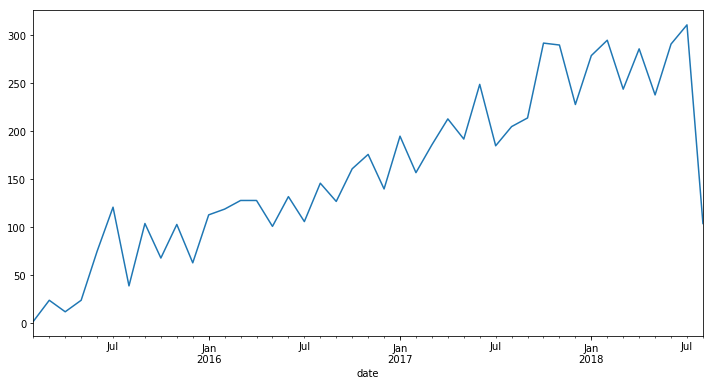

6B000000341


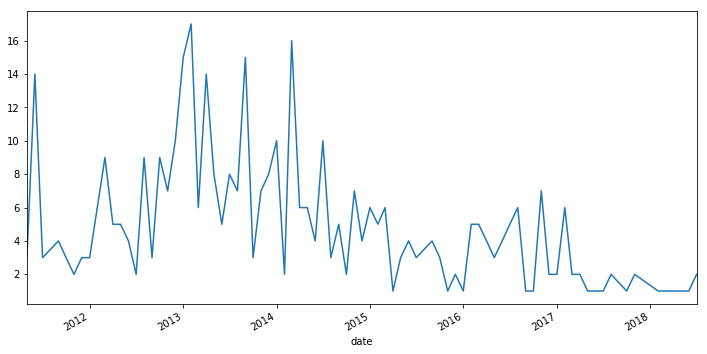

6AJ00000115


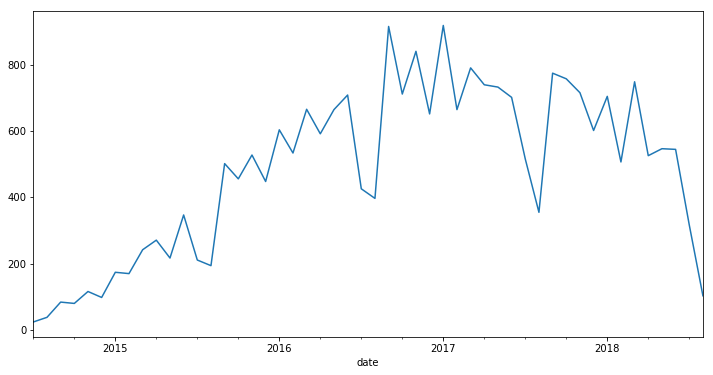

In [5]:
from matplotlib import pyplot as plt
for i in liste:
    df=commandes[commandes['reference']==i]
    commandes1=pd.Series(df['quantites'].values,pd.to_datetime(df['date']))
    commandes1=commandes1.sort_index()
    commandes1.plot(figsize=(12,6),label=i)
    print(i)
    plt.show()

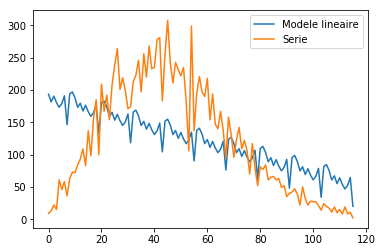

0.240851995887


In [3]:
from matplotlib import pyplot as plt
df2=commandes[commandes['reference']=='6B000000192']
commandes2=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes2=commandes2.sort_index()
T=len(commandes2)
Y=commandes2.values
    #Modele 1
X_1=np.hstack([np.arange(T).reshape(-1,1),np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
alpha_1=np.linalg.solve(np.dot(X_1.T,X_1),np.dot(X_1.T,Y))
res=Y-np.dot(X_1,alpha_1)
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2=1-SCE/SCT
plt.plot(np.dot(X_1,alpha_1),label='Modele lineaire')
plt.plot(Y,label='Serie')
plt.legend()
plt.show()
print(R2)

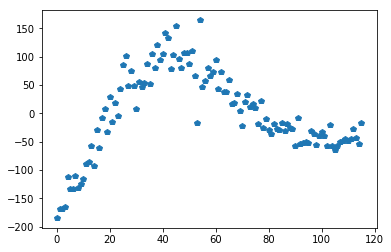

In [4]:
plt.plot(res,'p')

plt.show()

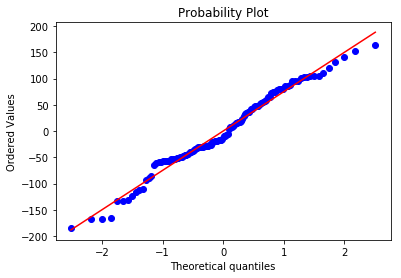

In [5]:
import numpy as np 
import pylab 
import scipy.stats as stats

#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

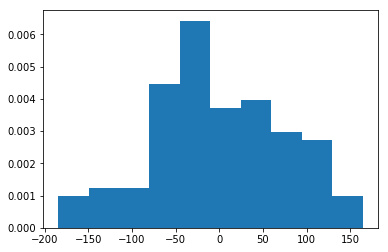

In [6]:
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.hist(res,normed=1)
x_axis = np.arange(-10, 20, 0.001)
#plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.show()


In [5]:
t0=np.argmax(res)

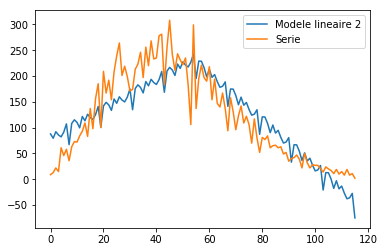

0.749067014558


In [6]:
first_col=np.vstack([np.arange(t0).reshape(-1,1),t0*np.ones(T-t0).reshape(-1,1)])
second_col=np.vstack([np.zeros(t0).reshape(-1,1),(np.arange(t0,T)-t0).reshape(-1,1)])
X_2=np.hstack([first_col,second_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
alpha_2=np.linalg.solve(np.dot(X_2.T,X_2),np.dot(X_2.T,Y))
res=Y-np.dot(X_2,alpha_2)
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2_2=1-SCE/SCT
#plt.plot(np.dot(X_1,alpha_1),label='Modele lineaire 1')
plt.plot(np.dot(X_2,alpha_2),label='Modele lineaire 2')
plt.plot(Y,label='Serie')
plt.legend()
plt.show()
print(R2_2)

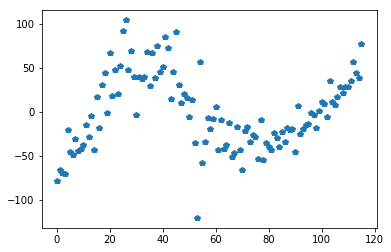

In [7]:
plt.plot(res,'p')
#plt.plot(np.diff(res))

plt.show()

In [9]:
t1=np.argmax(res)
t2=np.argmin(res)
t2

53

R2 modele 2 0.7490670145577379 contre R2 modele 3 0.8935060007451288


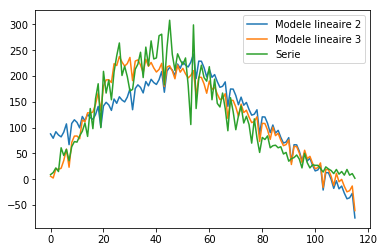

In [10]:
first_col=np.vstack([np.arange(t1).reshape(-1,1),t1*np.ones(T-t1).reshape(-1,1)])
second_col=np.vstack([np.zeros(t1).reshape(-1,1),(np.arange(t1,t2)-t1).reshape(-1,1),(t2-t1)*np.ones(T-t2).reshape(-1,1)])
third_col=np.vstack([np.zeros(t2).reshape(-1,1),(np.arange(t2,T)-t2).reshape(-1,1)])
X_3=np.hstack([first_col,second_col,third_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
alpha_3=np.linalg.solve(np.dot(X_3.T,X_3),np.dot(X_3.T,Y))
res=Y-np.dot(X_3,alpha_3)
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2_3=1-SCE/SCT
print('R2 modele 2 {} contre R2 modele 3 {}'.format(R2_2,R2_3))
plt.plot(np.dot(X_2,alpha_2),label='Modele lineaire 2')
plt.plot(np.dot(X_3,alpha_3),label='Modele lineaire 3')
plt.plot(Y,label='Serie')
plt.legend()
plt.show()

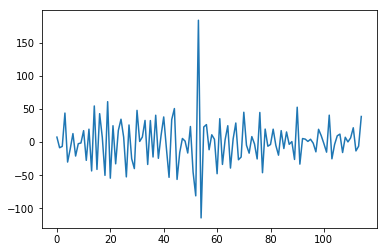

In [15]:
#plt.plot(res)
plt.plot(np.diff(res))

plt.show()

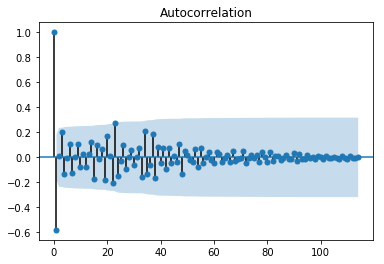

C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.6-win-amd64.egg\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


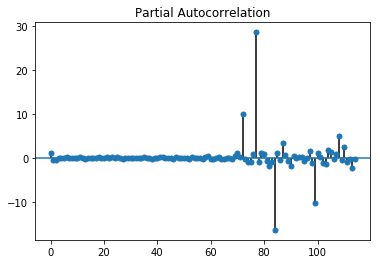

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot 

#pyplot.subplot(211)
plot_acf(np.diff(res), ax=pyplot.gca())
#pyplot.subplot(212)
pyplot.show()
plot_pacf(np.diff(res), ax=pyplot.gca())
pyplot.figure()
pyplot.show()

In [47]:
from pyramid.arima import auto_arima

stepwise_model = auto_arima(res, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
print(stepwise_model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=1071.677, BIC=1082.656, Fit time=0.470 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1145.664, BIC=1151.154, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1100.287, BIC=1108.521, Fit time=0.137 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1076.426, BIC=1084.661, Fit time=0.177 seconds
Fit ARIMA: order=(2, 1, 1); AIC=1067.814, BIC=1081.539, Fit time=0.571 seconds
Fit ARIMA: order=(2, 1, 0); AIC=1069.312, BIC=1080.291, Fit time=0.195 seconds
Fit ARIMA: order=(2, 1, 2); AIC=1069.776, BIC=1086.245, Fit time=0.550 seconds
Fit ARIMA: order=(3, 1, 2); AIC=1071.722, BIC=1090.936, Fit time=1.192 seconds
Fit ARIMA: order=(3, 1, 1); AIC=1069.762, BIC=1086.231, Fit time=0.499 seconds
Total fit time: 3.817 seconds
1067.8143113173069
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  115
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -528.907
Met

In [45]:
import numpy as np
np.random.seed(12345)
arparams = np.array([0])
maparams = np.array([-.6])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arima_process.arma_generate_sample(ar, ma, 50)
model = sm.tsa.arima_model.ARMA(y, (1, 1)).fit(trend='nc', disp=0)
model.params
y


array([-0.20470766,  0.60176793, -0.80680472, -0.24406708,  2.29921876,
        0.21393749, -0.74313562,  0.22600143,  0.59997488,  0.7850212 ,
        0.25932852, -1.90053472,  1.0527243 ,  0.0639179 ,  1.21556911,
        0.07467924, -2.53349491,  0.82913985,  1.89213083, -1.43998492,
       -0.2765996 ,  0.80082988,  2.96275291, -2.97059388,  0.03564921,
        0.47037366,  0.2281408 ,  0.34220393, -0.31332296,  1.34324563,
       -1.51982986, -0.40302715, -1.87153953, -0.4386218 ,  0.25569907,
        1.07659973, -1.60202167,  0.87938782, -1.13540872,  0.97099018,
       -2.55914844,  1.21610833, -1.42226975, -0.0455386 , -0.7245887 ,
        1.0705679 ,  0.20617426, -0.980677  ,  0.78361757,  1.15097082])

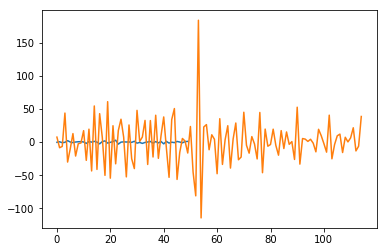

In [48]:
plt.plot(y)
plt.plot(np.diff(res))
plt.show()

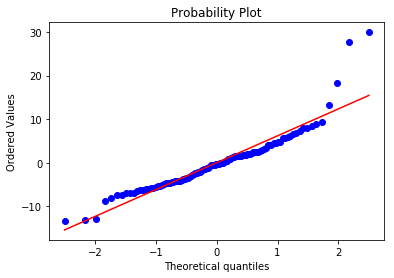

In [10]:
import numpy as np 
import pylab 
import scipy.stats as stats

#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

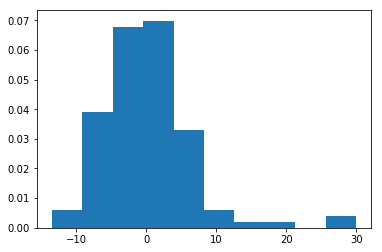

In [11]:
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.hist(res,normed=1)
x_axis = np.arange(-10, 20, 0.001)
#plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.show()

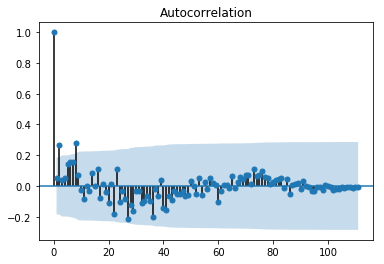

C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.6-win-amd64.egg\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


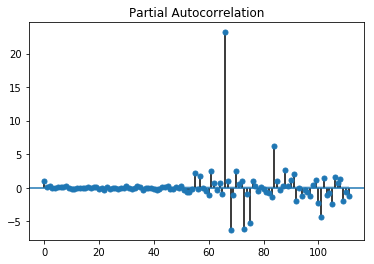

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot 

#pyplot.subplot(211)
plot_acf(res, ax=pyplot.gca())
#pyplot.subplot(212)
pyplot.show()
plot_pacf(res, ax=pyplot.gca())
pyplot.figure()
pyplot.show()

In [73]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
d =range(1,2)
p = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

import numpy as np
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Y, 
                                            #trend=np.poly1d([1,0,1]),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:778.0895802765548
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:644.4398412879353
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:665.0700594321135
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:660.2237608677207
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:716.0473664479754
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:578.8440174883956
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:605.9103787183159
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:594.18457564133
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:739.3122429257612
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:600.1238346979974
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:606.7633759263347
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:608.5122935929478
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:718.0425510550698
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:575.1151376262292
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:593.0589088610228
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:587.3511980925549


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2988      0.116     -2.572      0.010      -0.526      -0.071
ma.L1         -0.7288      0.093     -7.825      0.000      -0.911      -0.546
ma.S.L12      -0.7445      0.140     -5.303      0.000      -1.020      -0.469
sigma2        43.9935      6.442      6.829      0.000      31.367      56.620


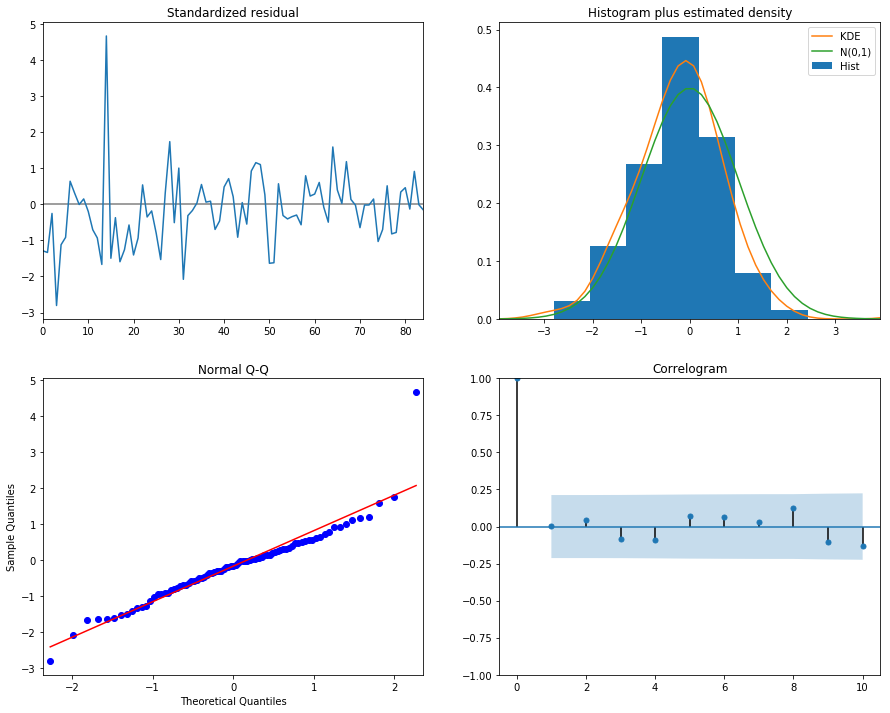

In [86]:
mod = sm.tsa.statespace.SARIMAX(Y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)



results = mod.fit()
res = mod.filter(results.params)
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [87]:
predict = res.get_prediction()
predict_ci = predict.conf_int()

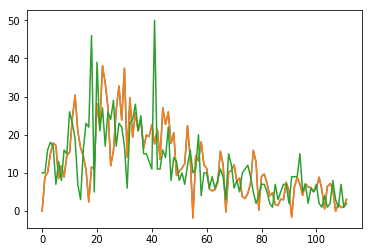

In [95]:
plt.plot(predict.predicted_mean)
plt.plot(Y)
plt.show()

In [84]:
output=results.get_forecast(12)
output.predicted_mean

array([ 3.37493636,  4.17097606,  1.17645439, -0.27034942,  3.94533752,
        3.68371156,  5.57874407,  0.75307921,  1.00407628,  1.3528437 ,
        0.37348054,  0.62012839])

In [74]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(Y, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
print(stepwise_model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=696.988, BIC=709.964, Fit time=0.642 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=787.894, BIC=793.084, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=721.212, BIC=731.592, Fit time=0.295 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=696.864, BIC=707.244, Fit time=0.555 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=698.521, BIC=711.497, Fit time=1.644 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=734.135, BIC=741.920, Fit time=0.137 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=698.592, BIC=711.567, Fit time=1.063 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=699.602, BIC=715.173, Fit time=2.820 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=757.278, BIC=765.063, Fit time=0.160 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 

In [49]:
res=-Y-stepwise_model.predict_in_sample()
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2=1-SCE/SCT
plt.plot(stepwise_model.predict_in_sample(),label='prediction')
plt.plot(Y,label='reel')
plt.legend()
plt.show()
print(R2)

ValueError: operands could not be broadcast together with shapes (116,) (115,) 

In [49]:
stepwise_model.predict(20)

array([-0.53514773, -0.5351478 , -0.53514788, -0.53514795, -0.53514802,
       -0.53514809, -0.53514816, -0.53514823, -0.5351483 , -0.53514838,
       -0.53514845, -0.53514852, -0.53514859, -0.53514866, -0.53514873,
       -0.5351488 , -0.53514888, -0.53514895, -0.53514902, -0.53514909])

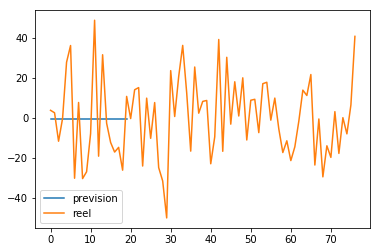

In [51]:
plt.plot(stepwise_model.predict(20),label='prevision')
plt.plot(res,label='reel')
plt.legend()
plt.show()

In [38]:
u=np.random.randn(len(res))

In [39]:
v=np.array([-1,1])

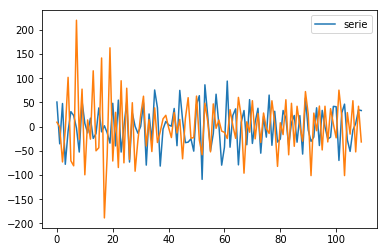

In [42]:
a=list()
for i in range(len(u)-1): 
    a.append(np.sum(u[i:i+2]*v))
res2=np.diff(res)-a
SCT=np.sum((np.diff(res)-np.mean(np.diff(res)))**2)
SCE=np.sum(res2**2)
R2_3=1-SCE/SCT
a=[30*b for b in a]
plt.plot(a,label='serie')
plt.plot(np.diff(res))
plt.legend()
plt.show()    

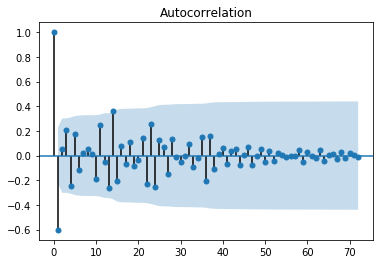

C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels-0.8.0-py3.6-win-amd64.egg\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


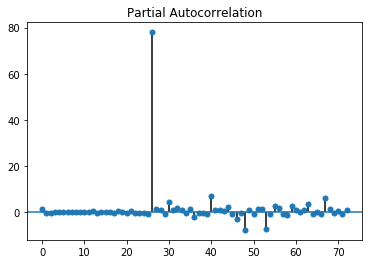

In [80]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot 

#pyplot.subplot(211)
plot_acf(np.diff(res), ax=pyplot.gca())
#pyplot.subplot(212)
pyplot.show()
plot_pacf(np.diff(res), ax=pyplot.gca())
pyplot.figure()
pyplot.show()
pyplot.show()


In [81]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(res, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=408.512, BIC=417.674, Fit time=0.081 seconds
Fit ARIMA: order=(0, 1, 0); AIC=458.240, BIC=462.821, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=425.483, BIC=432.355, Fit time=0.028 seconds
Fit ARIMA: order=(0, 1, 1); AIC=407.830, BIC=414.701, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=410.345, BIC=421.798, Fit time=0.087 seconds
Total fit time: 0.261 seconds
407.8300170273071


In [82]:
print(stepwise_model.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   73
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -200.915
Method:                       css-mle   S.D. of innovations              3.683
Date:                Fri, 17 Aug 2018   AIC                            407.830
Time:                        14:40:14   BIC                            414.701
Sample:                             1   HQIC                           410.568
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.281e-09      0.020  -2.63e-07      1.000      -0.039       0.039
ma.L1.D.y     -1.0000      0.051    -19.705      0.000      -1.099      -0.901
                                    Roots           

In [9]:
t=min(np.argmax(res),np.argmin(res))
np.corrcoef(np.array(range(t)),res[:t])[0,1]


-0.079674727728116415

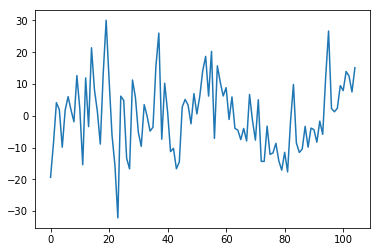

In [58]:
plt.plot(res)
plt.show()

In [76]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(res, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
print(stepwise_model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=796.952, BIC=810.222, Fit time=0.223 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=807.851, BIC=813.159, Fit time=0.000 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=795.832, BIC=806.448, Fit time=0.166 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=797.220, BIC=807.836, Fit time=0.150 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=794.905, BIC=802.867, Fit time=0.047 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 12); AIC=795.156, BIC=805.772, Fit time=0.109 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 12); AIC=796.278, BIC=809.548, Fit time=0.271 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=796.899, BIC=807.515, Fit time=0.078 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=796.885, BIC=807.501, Fit time=0.063 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 

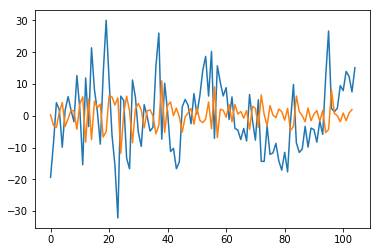

In [92]:
from pyramid.arima import ARIMA

fit = ARIMA(order=(1, 1, 0), seasonal_order=None).fit(y=res)
pred_res= fit.predict_in_sample()
plt.plot(res)
plt.plot(pred_res)
plt.show()

0.133590941267


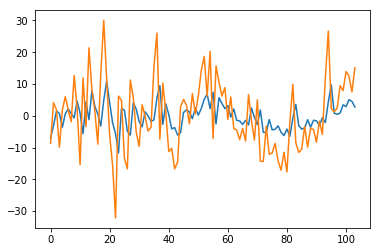

In [85]:
#ARIMA(1,0,0)



X_res=res[:-1]
Y_res=res[1:]
#X=np.vstack([a*np.eye(T)[0],np.hstack([np.eye(T-1),np.zeros(T-1).reshape(-1,1)])])
phi=np.dot(X_res.T,Y_res)/np.dot(X_res.T,X_res)
res1=Y_res-np.dot(X_res,phi)
SCT=np.sum((Y_res-np.mean(Y_res))**2)
SCE=np.sum(res1**2)
R2=1-SCE/SCT
print(R2)
plt.plot(np.dot(phi,X_res))
plt.plot(Y_res)
plt.show()

In [81]:
def AR1(serie):
    
    X_res=serie[:-1]
    Y_res=serie[1:]
    phi=np.dot(X_res.T,Y_res)/np.dot(X_res.T,X_res)
    res1=Y_res-np.dot(X_res,phi)
    SCT=np.sum((Y_res-np.mean(Y_res))**2)
    SCE=np.sum(res1**2)
    R2=1-SCE/SCT
    return np.hstack([serie[0],np.dot(phi,X_res)]),phi

In [93]:
def AR1_wc(serie):
    
    X_res=np.hstack([np.ones(len(serie)-1).reshape(-1,1),serie[:-1].reshape(-1,1)])
    Y_res=serie[1:]
    alpha=np.linalg.solve(np.dot(X_res.T,X_res),np.dot(X_res.T,Y_res))
    res1=Y_res-np.dot(X_res,alpha)
    SCT=np.sum((Y_res-np.mean(Y_res))**2)
    SCE=np.sum(res1**2)
    R2=1-SCE/SCT
    return np.hstack([serie[0],np.dot(X_res,alpha)]),alpha

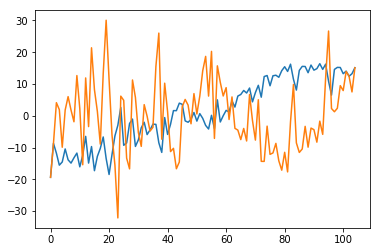

array([ 0.3143454 , -0.31899745])

In [94]:
# On estime les résidus différenciés à l'aire d'un ARIMA(1,1,0)
res_diff=np.diff(res)
pred,alph=AR1_wc(res_diff)
pr_res=np.hstack([res[0],pred]).cumsum()
plt.plot(pr_res)
plt.plot(res)
plt.show()
alph

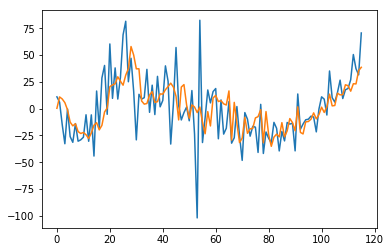

In [291]:
stepwise_model.fit(res)
pred_res = stepwise_model.predict_in_sample()
plt.plot(res)
plt.plot(future_forecast)
plt.show()

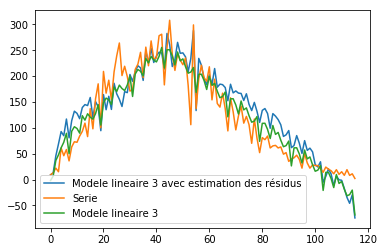

0.788188158517


In [301]:
Y=commandes2.values
plt.plot(np.dot(X_3,alpha_3)+pr_res,label='Modele lineaire 3 avec estimation des résidus')
plt.plot(Y,label='Serie')
res=Y-(np.dot(X_3,alpha_3)+pr_res)
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2=1-SCE/SCT
plt.plot(np.dot(X_3,alpha_3),label='Modele lineaire 3')
plt.legend()
plt.show()
print(R2)

0.331885723724


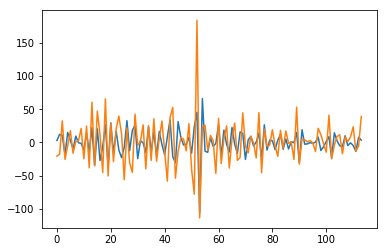

In [168]:
# On estime les résidus différenciés à l'aire d'un AR(1)
res_diff=np.diff(res)
Y_res=res_diff[1:]
#X=np.vstack([a*np.eye(T)[0],np.hstack([np.eye(T-1),np.zeros(T-1).reshape(-1,1)])])
X_res=res_diff[:-1]
phi=np.dot(X_res.T,Y_res)/np.dot(X_res.T,X_res)
res1=Y_res-np.dot(X_res,phi)
SCT=np.sum((Y_res-np.mean(Y_res))**2)
SCE=np.sum(res1**2)
R2=1-SCE/SCT
print(R2)
plt.plot(np.dot(phi,X_res))
plt.plot(Y_res)
plt.show()

In [169]:
pred_res_diff=np.hstack([res_diff[0],np.dot(phi,X_res)])

In [170]:
pred_res=np.hstack([res[0],pred_res_diff]).cumsum()

In [145]:
train = res_diff[:round(len(res_diff)*0.65)]
test = res_diff[round(len(res_diff)*0.65):]

In [23]:
stepwise_model.fit(train)
future_forecast = stepwise_model.predict(len(test))
plt.plot(test)
plt.plot(future_forecast)
plt.show()

NameError: name 'stepwise_model' is not defined

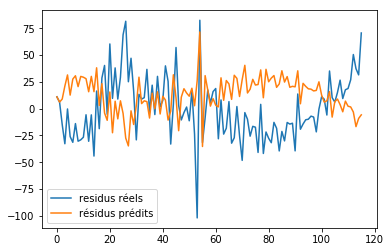

In [171]:
plt.plot(res,label="residus réels")
plt.plot(pred_res,label="résidus prédits")
plt.legend()
plt.show()

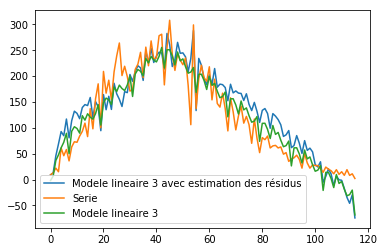

0.860120806688


In [172]:
Y=commandes2.values
plt.plot(np.dot(X_3,alpha_3)+pred_res,label='Modele lineaire 3 avec estimation des résidus')
plt.plot(Y,label='Serie')
res=Y-np.dot(X_3,alpha_3)+pred_res
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2=1-SCE/SCT
plt.plot(np.dot(X_3,alpha_3),label='Modele lineaire 3')
plt.legend()
plt.show()
print(R2)

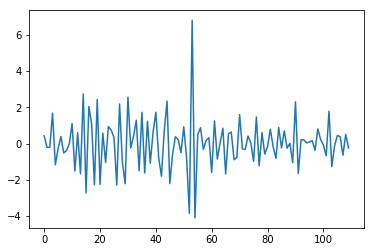

In [108]:
#plt.plot(res/np.std(res))
res_norm=res/np.std(res)
plt.plot(np.diff(res_norm))
plt.show()

In [102]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(res_norm, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=295.134, BIC=308.636, Fit time=0.381 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=393.958, BIC=399.359, Fit time=0.017 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=337.731, BIC=348.532, Fit time=0.130 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=283.982, BIC=300.185, Fit time=1.156 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=299.714, BIC=313.216, Fit time=0.405 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=303.400, BIC=314.202, Fit time=0.198 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, F

In [103]:
train = res_norm[:round(len(res)*0.65)]
test = res_norm[round(len(res)*0.65):]

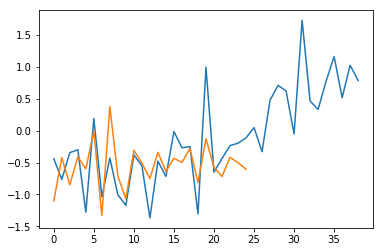

In [104]:
stepwise_model.fit(train)
future_forecast = stepwise_model.predict(25)
plt.plot(test)
plt.plot(future_forecast)
plt.show()

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def prev(reference):
    #table_R2=pd.DataFrame(columns=['R2 modele lineaire','R2 modele lineaire par morceaux','R2 modele polynomial de degré 2'])
    df2=commandes[commandes['reference']==reference]
    commandes2=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
    commandes2=commandes2.sort_index()
    T=len(commandes2)
    Y=commandes2.values
    #Modele 1
    X_1=np.hstack([np.arange(T).reshape(-1,1),np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
    alpha_1=np.linalg.solve(np.dot(X_1.T,X_1),np.dot(X_1.T,Y))
    res=Y-np.dot(X_1,alpha_1)
    SCT=np.sum((Y-np.mean(Y))**2)
    SCE=np.sum(res**2)
    R2=1-SCE/SCT
    # calcul de t0
    if np.mean(res[:3])<0 and np.mean(res[-3:])<0:
        t0=np.argmax(res)
    elif np.mean(res[:3])>0 and np.mean(res[-3:])>0:
        t0=np.argmin(res)
    else:
        return R2,0,0,0,0,0
    tps_t0=commandes2.index[t0]
    #Modele 2
    first_col=np.vstack([np.arange(t0).reshape(-1,1),t0*np.ones(T-t0).reshape(-1,1)])
    second_col=np.vstack([np.zeros(t0).reshape(-1,1),(np.arange(t0,T)-t0).reshape(-1,1)])
    X_2=np.hstack([first_col,second_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
    alpha_2=np.linalg.solve(np.dot(X_2.T,X_2),np.dot(X_2.T,Y))
    res=Y-np.dot(X_2,alpha_2)
    SCT=np.sum((Y-np.mean(Y))**2)
    SCE=np.sum(res**2)
    R2_2=1-SCE/SCT
    # choix t1 et t2
    t1=min(np.argmax(res),np.argmin(res))
    t2=max(np.argmax(res),np.argmin(res))
    tps_t1=commandes2.index[t1]
    tps_t2=commandes2.index[t2]
    if abs(np.corrcoef(np.array(range(t1)),res[:t1])[0,1])<0.5:
        return R2,R2_2,t0,0,0,0
    #Modele 3(lin p m 3 morceaux)
    first_col=np.vstack([np.arange(t1).reshape(-1,1),t1*np.ones(T-t1).reshape(-1,1)])
    second_col=np.vstack([np.zeros(t1).reshape(-1,1),(np.arange(t1,t2)-t1).reshape(-1,1),(t2-t1)*np.ones(T-t2).reshape(-1,1)])
    third_col=np.vstack([np.zeros(t2).reshape(-1,1),(np.arange(t2,T)-t2).reshape(-1,1)])
    X_3=np.hstack([first_col,second_col,third_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
    alpha_3=np.linalg.solve(np.dot(X_3.T,X_3),np.dot(X_3.T,Y))
    res=Y-np.dot(X_3,alpha_3)
    SCT=np.sum((Y-np.mean(Y))**2)
    SCE=np.sum(res**2)
    R2_3=1-SCE/SCT
    #Modèle 4
    #X_4=np.hstack([np.square(np.arange(T).reshape(-1,1)),np.hstack([np.arange(T).reshape(-1,1),np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])])
    #alpha_4=np.linalg.solve(np.dot(X_4.T,X_4),np.dot(X_4.T,Y))
    #res=Y-np.dot(X_4,alpha_4)
    #SCT=np.sum((Y-np.mean(Y))**2)
    #SCE=np.sum(res**2)
    #R2_4=1-SCE/SCT
    plt.plot(Y, label='Serie')
    if R2>R2_2:
        print('Le meilleur modèle est le modele lineaire')
        plt.plot(np.dot(X_1,alpha_1))
    else:
        print('Le meilleur modèle est le modele piecewise lineaire:R2 {} contre R2 {}, R2 poly:{} '.format(R2_2,R2,R2_3))
        plt.plot(np.dot(X_2,alpha_2),label='Modele lineaire par morceaux')
        plt.plot(np.dot(X_1,alpha_1),label='Modele lineaire')
        #plt.plot(np.dot(X_3,alpha_3),label='Modele 3')
    plt.legend()
    plt.show()
    return R2,R2_2,t0,R2_3,t1,t2

In [102]:
liste=np.random.choice(ref_12,5)

In [88]:
table_R2=pd.DataFrame(columns=['R2 max','R2 modele lin 1','R2 modele lin 2','t0','R2 modele lin 3','t1','t2'])
table_R2

,R2 max,R2 modele lin 1,R2 modele lin 2,t0,R2 modele lin 3,t1,t2


Le meilleur modèle est le modele piecewise lineaire:R2 0.21071887409235557 contre R2 0.15872595895562502, R2 poly:0.26608524550918866 


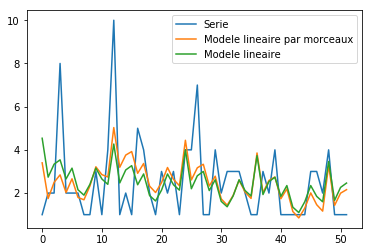

Le meilleur modèle est le modele piecewise lineaire:R2 0.9147545174463593 contre R2 0.7794106491343631, R2 poly:0.8809615128874537 


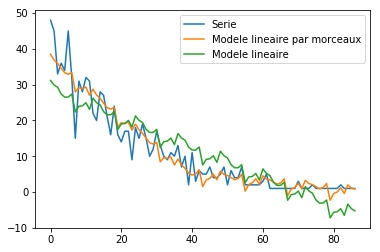

Le meilleur modèle est le modele piecewise lineaire:R2 0.8156639055267824 contre R2 0.7115970558028071, R2 poly:0.820478810652455 


C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3088: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


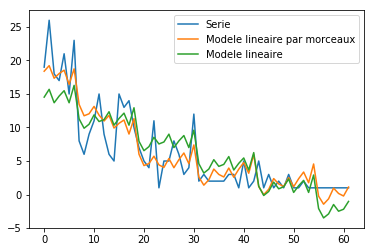

Le meilleur modèle est le modele piecewise lineaire:R2 0.9191907931364993 contre R2 0.7932005037227547, R2 poly:0.8414973274311457 


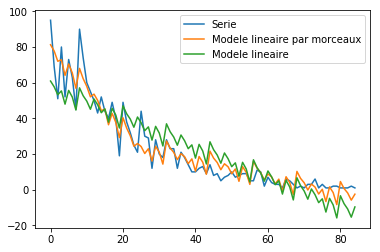

Le meilleur modèle est le modele piecewise lineaire:R2 0.5298135852911134 contre R2 0.452247191011236, R2 poly:0.5301240565554455 


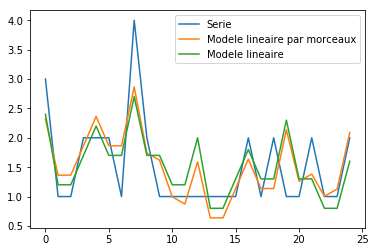

Le meilleur modèle est le modele piecewise lineaire:R2 0.5704693657237541 contre R2 0.5645910780669144, R2 poly:0.651425180776033 


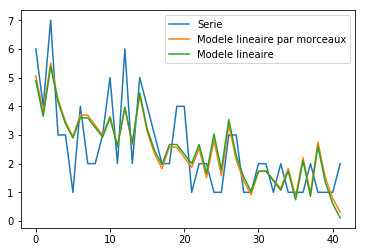

Le meilleur modèle est le modele piecewise lineaire:R2 0.7445743527017172 contre R2 0.18358393301161569, R2 poly:0.7693209976816533 


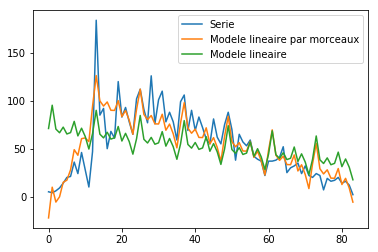

C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\moosb\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Le meilleur modèle est le modele piecewise lineaire:R2 0.9268331222976309 contre R2 0.8088958372938858, R2 poly:0.856216787162039 


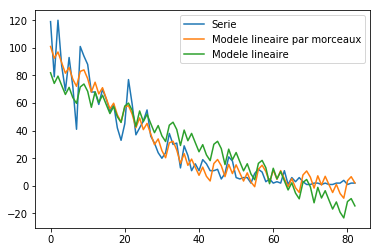

Le meilleur modèle est le modele piecewise lineaire:R2 0.7485479125994015 contre R2 0.6759839629566886, R2 poly:0.8277982593021779 


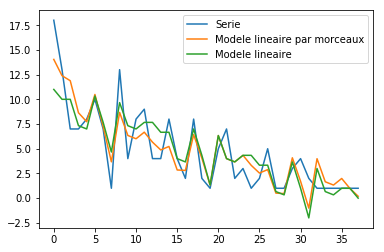

Le meilleur modèle est le modele piecewise lineaire:R2 0.9395948008070867 contre R2 0.7919979098633592, R2 poly:0.8323640207789618 


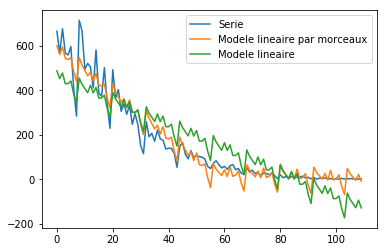

Le meilleur modèle est le modele piecewise lineaire:R2 0.9253344434704462 contre R2 0.8399989924329072, R2 poly:0.8607971085468757 


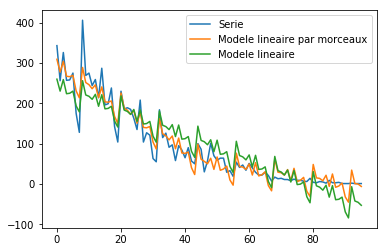

Le meilleur modèle est le modele piecewise lineaire:R2 0.7166014449127032 contre R2 0.6914222642699464, R2 poly:0.7493180384736675 


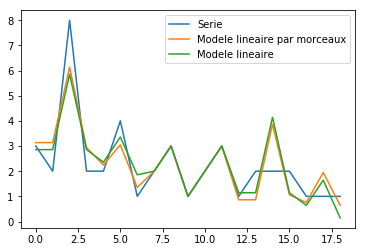

Le meilleur modèle est le modele piecewise lineaire:R2 0.9638297872340426 contre R2 0.9276595744680851, R2 poly:1.0 


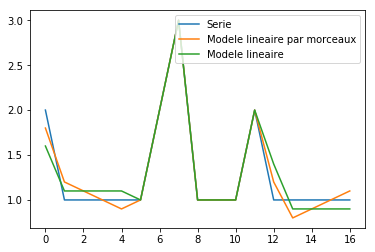

Le meilleur modèle est le modele piecewise lineaire:R2 0.775705355776309 contre R2 0.7754600142930499, R2 poly:0.7761483666661988 


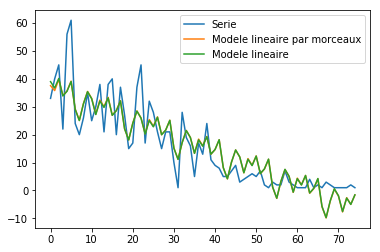

Le meilleur modèle est le modele piecewise lineaire:R2 0.8643066713548083 contre R2 0.8195265896305123, R2 poly:0.8273474664306377 


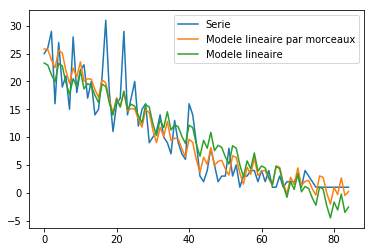

Le meilleur modèle est le modele piecewise lineaire:R2 0.9603366279525705 contre R2 0.8185229224403601, R2 poly:0.8561982819216681 


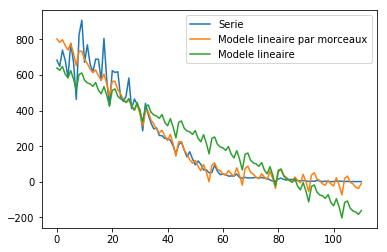

Le meilleur modèle est le modele piecewise lineaire:R2 0.8162807017543859 contre R2 0.8133333333333334, R2 poly:0.8231578947368421 


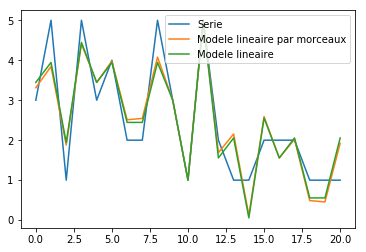

Le meilleur modèle est le modele piecewise lineaire:R2 0.7574822846224303 contre R2 0.6606780910263499, R2 poly:0.8273515223600993 


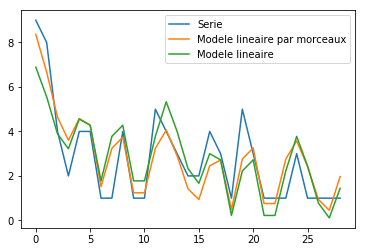

Le meilleur modèle est le modele piecewise lineaire:R2 0.6894518274426404 contre R2 0.6674092409240924, R2 poly:0.7022394552794204 


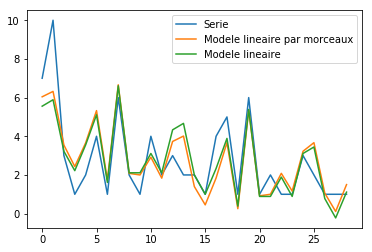

Le meilleur modèle est le modele piecewise lineaire:R2 0.8970097433112102 contre R2 0.8249865393003482, R2 poly:0.8991628795568425 


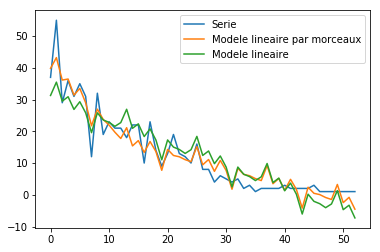

Le meilleur modèle est le modele piecewise lineaire:R2 0.8660257105027389 contre R2 0.8256903035762801, R2 poly:0.8275864443153368 


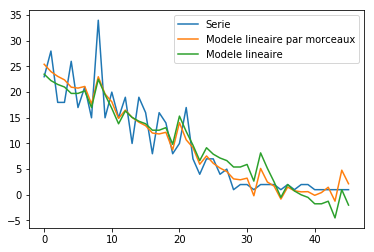

Le meilleur modèle est le modele piecewise lineaire:R2 0.8845792181355399 contre R2 0.825717427057872, R2 poly:0.8841085604786438 


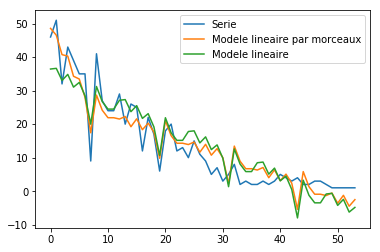

Le meilleur modèle est le modele piecewise lineaire:R2 0.9232239319889288 contre R2 0.8395047111775609, R2 poly:0.9248525536494595 


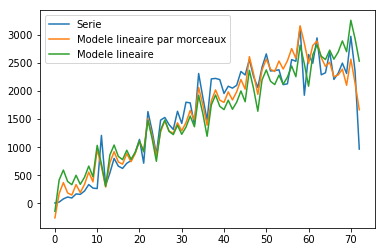

Le meilleur modèle est le modele piecewise lineaire:R2 0.6115538087316625 contre R2 0.4720378337904788, R2 poly:0.570498066610772 


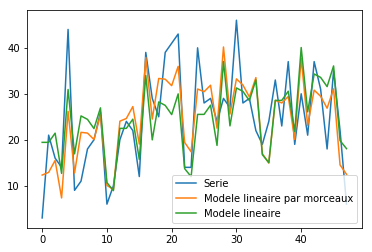

Le meilleur modèle est le modele piecewise lineaire:R2 0.9472564260499409 contre R2 0.8160562546193584, R2 poly:0.8579620510936787 


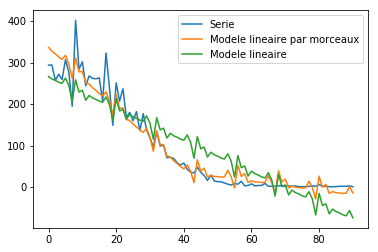

Le meilleur modèle est le modele piecewise lineaire:R2 0.8615626592826856 contre R2 0.4461763921017806, R2 poly:0.8779628244183608 


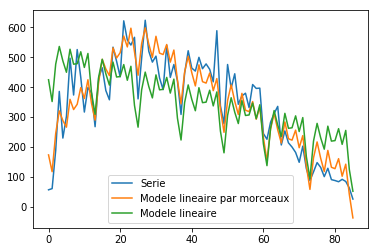

Le meilleur modèle est le modele piecewise lineaire:R2 0.9028090897772937 contre R2 0.19514681380771015, R2 poly:0.9355402232955509 


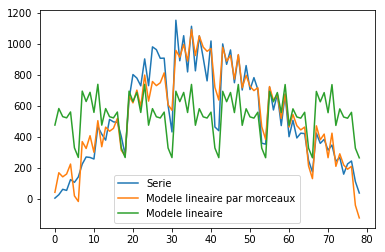

Le meilleur modèle est le modele piecewise lineaire:R2 0.8551220694629718 contre R2 0.5779672672163663, R2 poly:0.9110428770706591 


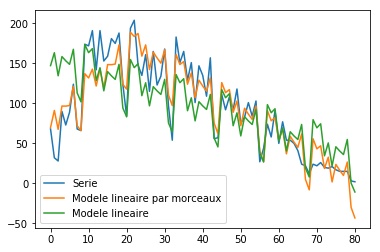

Le meilleur modèle est le modele piecewise lineaire:R2 0.9072462076809387 contre R2 0.6467202945795774, R2 poly:0.9128970615674267 


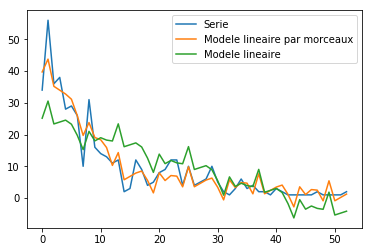

Le meilleur modèle est le modele piecewise lineaire:R2 0.7947536836075038 contre R2 0.13017597802405245, R2 poly:0.9014037724148395 


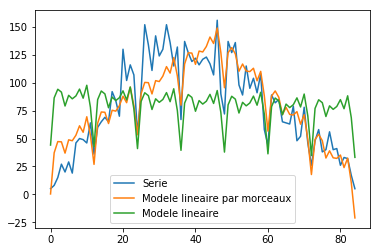

Le meilleur modèle est le modele piecewise lineaire:R2 0.926943381774249 contre R2 0.8169486558333348, R2 poly:0.959280494630786 


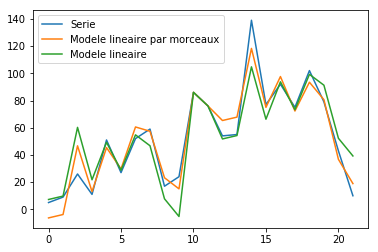

Le meilleur modèle est le modele piecewise lineaire:R2 0.89360502384243 contre R2 0.8462425042488855, R2 poly:0.862669806655926 


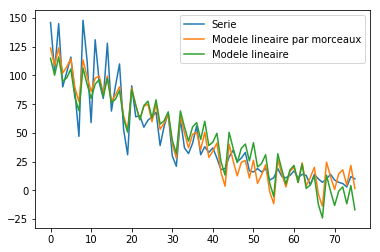

Le meilleur modèle est le modele piecewise lineaire:R2 0.7490670145577379 contre R2 0.24085199588658335, R2 poly:0.8935060007451288 


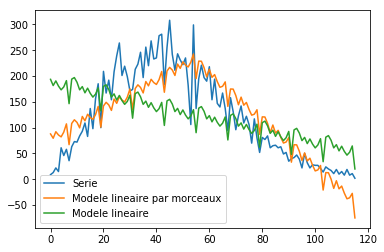

Le meilleur modèle est le modele piecewise lineaire:R2 0.48557067987749003 contre R2 0.3518754877193909, R2 poly:0.49710808692695396 


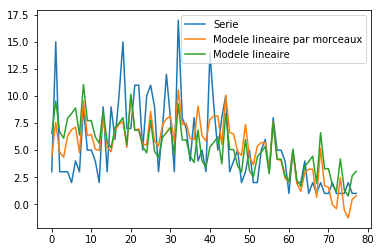

Le meilleur modèle est le modele piecewise lineaire:R2 0.4526587707188381 contre R2 0.286572581511252, R2 poly:0.38335590083618865 


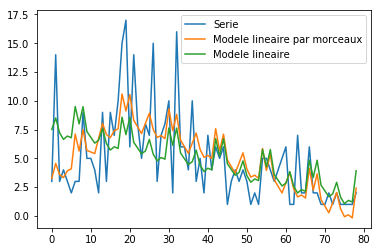

Le meilleur modèle est le modele piecewise lineaire:R2 0.9625131554019308 contre R2 0.9203051357297236, R2 poly:0.9764786053147437 


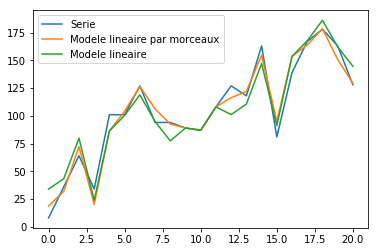

Le meilleur modèle est le modele piecewise lineaire:R2 0.4609281270665474 contre R2 0.3620327311751026, R2 poly:0.4243172057487691 


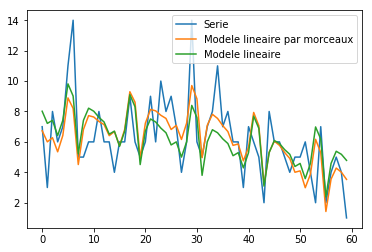

Le meilleur modèle est le modele piecewise lineaire:R2 0.9121658339724074 contre R2 0.8544135551217122, R2 poly:0.8965840280978102 


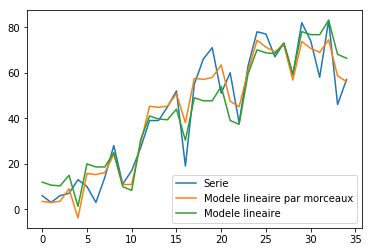

Le meilleur modèle est le modele piecewise lineaire:R2 0.33300418541175614 contre R2 0.2204706944685414, R2 poly:0.32293336569625264 


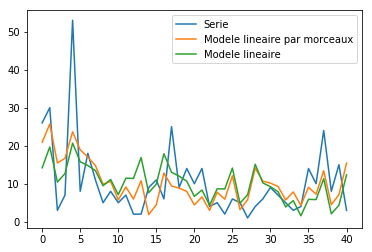

Le meilleur modèle est le modele piecewise lineaire:R2 0.9832214765100671 contre R2 0.9771812080536912, R2 poly:0.9914429530201342 


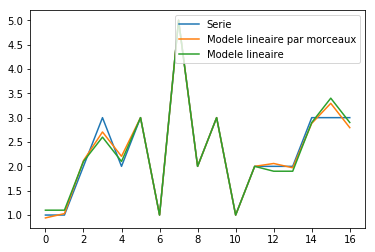

Le meilleur modèle est le modele piecewise lineaire:R2 0.6865945351182835 contre R2 0.5800438596491229, R2 poly:0.6970551378446115 


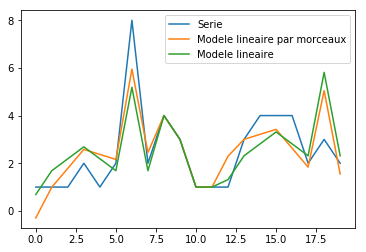

Le meilleur modèle est le modele piecewise lineaire:R2 0.38214675573407686 contre R2 0.14895342103085973, R2 poly:0.4241142820516166 


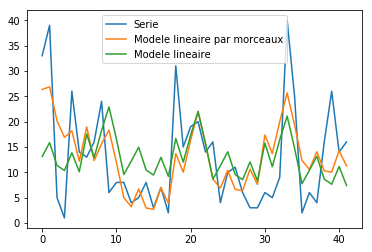

Le meilleur modèle est le modele piecewise lineaire:R2 0.9176603968089395 contre R2 0.8193642081763424, R2 poly:0.8885250298394405 


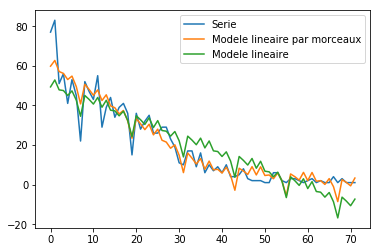

Le meilleur modèle est le modele piecewise lineaire:R2 0.826940233349813 contre R2 0.7597914212198041, R2 poly:0.8649320445998548 


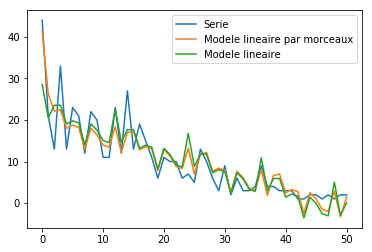

Le meilleur modèle est le modele piecewise lineaire:R2 0.8148152742753537 contre R2 0.6775637144417992, R2 poly:0.8599019331750745 


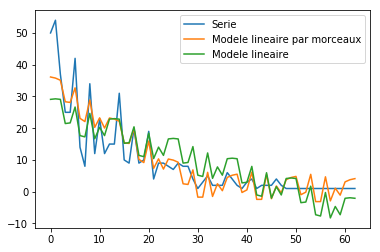

Le meilleur modèle est le modele piecewise lineaire:R2 0.8278541961334297 contre R2 0.7287133220129358, R2 poly:0.78396516336589 


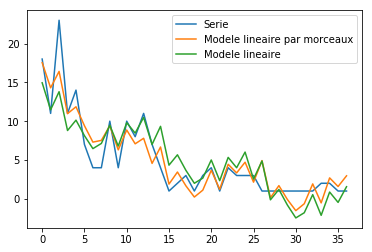

Le meilleur modèle est le modele piecewise lineaire:R2 0.40868851991931054 contre R2 0.20740704587127878, R2 poly:0.5054794091441387 


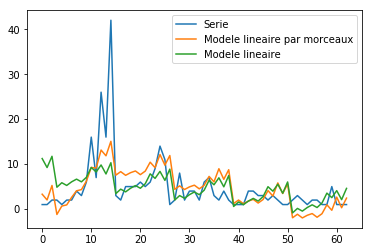

Le meilleur modèle est le modele piecewise lineaire:R2 0.7029096187759281 contre R2 0.5748773472661766, R2 poly:0.7150755416960588 


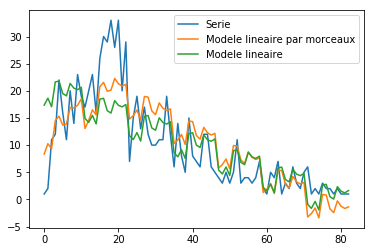

Le meilleur modèle est le modele piecewise lineaire:R2 0.6805926047462576 contre R2 0.5223515990320645, R2 poly:0.8539363372085174 


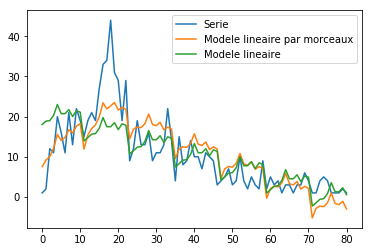

Le meilleur modèle est le modele piecewise lineaire:R2 0.608323133414933 contre R2 0.5394736842105265, R2 poly:0.723230490018149 


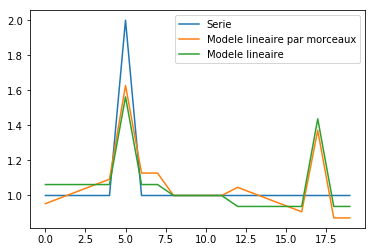

Le meilleur modèle est le modele piecewise lineaire:R2 0.4790249433106576 contre R2 0.4761904761904763, R2 poly:0.4761904761904763 


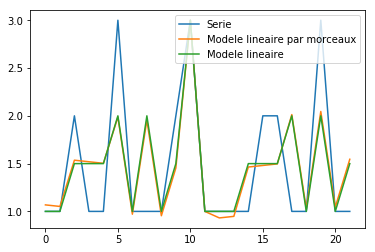

Le meilleur modèle est le modele piecewise lineaire:R2 0.77164692098217 contre R2 0.6903113941002412, R2 poly:0.7349764314404461 


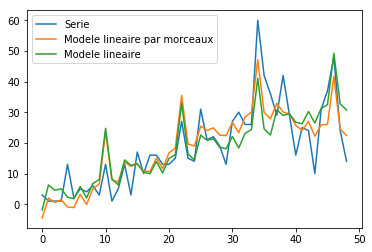

In [89]:
err_1=0
err_2=0
for i in ref_12:
    try:
        a,b,t0,c,t1,t2=prev(i)
        row=pd.Series({'R2 max':round(max(a,b,c),2),'R2 modele lin 1':round(a,2),'R2 modele lin 2':round(b,2),'t0':t0,'R2 modele lin 3':round(c,2),'t1':t1,'t2':t2},name=i)
        table_R2=table_R2.append(row)
    except UnboundLocalError as err:
        err_1+=1
        df2=commandes[commandes['reference']==i]
        commandes2=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
        commandes2=commandes2.sort_index()
        T=len(commandes2)
        Y=commandes2.values
        plt.plot(Y)
        plt.show()
    except np.linalg.LinAlgError as err:
        err_2+=1
        pass
    

In [113]:
table_R2

,R2 max,R2 modele lin 1,R2 modele lin 2,t0,R2 modele lin 3,t1,t2
099060065,0.27,0.16,0.21,12.0,0.27,3.0,15.0
21203945,0.44,0.44,0.00,0.0,0.00,0.0,0.0
21204094,0.91,0.78,0.91,39.0,0.88,5.0,7.0
21204095,0.82,0.71,0.82,23.0,0.82,1.0,13.0
21204099,0.92,0.90,0.92,21.0,0.00,0.0,0.0
21204100,0.92,0.79,0.92,24.0,0.84,2.0,8.0
22569345,0.53,0.45,0.53,19.0,0.53,7.0,19.0
22569346,0.65,0.56,0.57,24.0,0.65,5.0,12.0
44472206,0.77,0.33,0.77,31.0,0.00,0.0,0.0
44472609,0.65,0.34,0.65,55.0,0.00,0.0,0.0


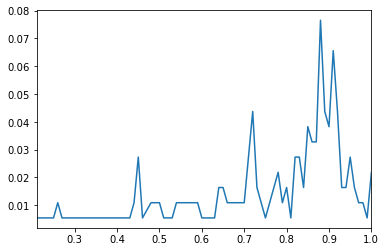

In [138]:
tab=table_R2['R2 max'].sort_values().value_counts()/183
tab.sort_index().plot()
plt.show()

In [107]:
table_R2['t0'].sort()[table_R2['t0']!=0].dt.date.value_counts().plot()
plt.show()

AttributeError: 'Series' object has no attribute 'sort'

In [26]:
table_R2.to_csv('table_R2')

In [137]:
table_R2.loc['6B000000192']

R2 modele lineaire               0.262020
R2 modele lineaire 2 morceaux    0.698996
R2 modele lineaire 3 morceaux    0.910383
Name: 6B000000192, dtype: float64

In [53]:
writer = pd.ExcelWriter('table_R2.xlsx')
table_R2.to_excel(writer,'Sheet1')
writer.save()

In [18]:
df2=commandes[commandes['reference']=='6LE20185300']
commandes2=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes2=commandes2.sort_index()

In [19]:
T=len(commandes2)
X=np.hstack([np.arange(T).reshape(-1,1),np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
alpha=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,commandes2.values))
res=commandes2.values-np.dot(X,alpha)
#if res[0]<0 and res[-1]<0:
t0=np.argmax(res)
#if res[0]>0 and res[-1]>0:
    #tO=np.argmin(res)
t0
plt.plot(res)
plt.show()

ValueError: need at least one array to concatenate

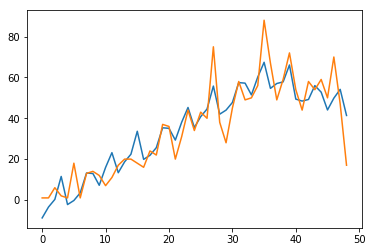

In [58]:
T=len(commandes2)
first_col=np.vstack([np.arange(t0).reshape(-1,1),t0*np.ones(T-t0).reshape(-1,1)])
second_col=np.vstack([np.zeros(t0).reshape(-1,1),(np.arange(t0,T)-t0).reshape(-1,1)])
X=np.hstack([first_col,second_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
alpha=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,commandes2.values))
plt.plot(np.dot(X,alpha))
plt.plot(commandes2.values)
plt.show()

In [24]:
# calcul du coef de determination R2
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2=1-SCE/SCT
print(R2)

0.955716158507


In [44]:
df1=commandes[commandes['reference']=='6AJ00000047']
commandes1=pd.Series(df1['quantites'].values,pd.to_datetime(df1['date']))
commandes1=commandes1.sort_index()

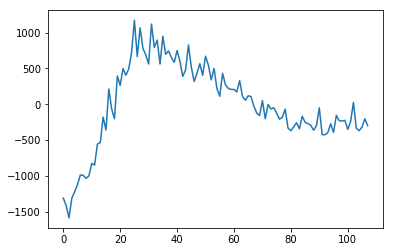

25

In [45]:
import matplotlib.pyplot as plt
T=len(commandes1)-2
X=np.hstack([np.arange(T).reshape(-1,1),np.concatenate(([np.eye(12) for i in range(9)]))])
alpha=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,commandes1[:108].values))
res=commandes1[:108].values-np.dot(X,alpha)
#if res[0]<0 and res[-1]<0:
plt.plot(res)
plt.show()
tO=np.argmax(res)
#if res[0]>0 and res[-1]>0:
    #tO=np.argmin(res)
tO

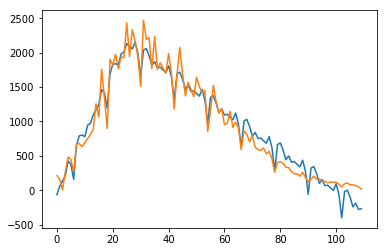

In [47]:
T=len(commandes1)
first_col=np.vstack([np.arange(25).reshape(-1,1),25*np.ones(T-25).reshape(-1,1)])
second_col=np.vstack([np.zeros(25).reshape(-1,1),(np.arange(25,T)-25).reshape(-1,1)])
X=np.hstack([first_col,second_col,np.vstack([np.concatenate(([np.eye(12) for i in range(9)])),np.eye(12)[:2,:]])])
alpha=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,commandes1.values))
plt.plot(np.dot(X,alpha))
plt.plot(commandes1.values)
plt.show()

In [ ]:
X=np.hstack([np.arange(33).reshape(1,-1).T,np.concatenate(([np.eye(12) for i in range(4)]))])
alpha=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,commandes2[:48].values))
res=commandes2[:48].values-np.dot(X,alpha)

In [150]:
if res[0]<0 and res[-1]<0:
    tO=np.argmax(res)
if res[0]>0 and res[-1]>0:
    tO=np.argmax(res)
tO

array([[  0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  4.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  5.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  6.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.],
       [  7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.],
       [  8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.],
       [  9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.],
       [ 10.,   0.,   0.,   0.,   0.,   0.,   0., 

In [30]:
np.eye(12)[:2,:]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [36]:
np.vstack([np.concatenate(([np.eye(12) for i in range(9)])),np.eye(12)[:2,:]])

(110, 12)

In [118]:
X=np.hstack([np.arange(24).reshape(1,-1).T,np.concatenate(([np.eye(4) for i in range(6)]))])
np.dot(X.T,X)

array([[ 4324.,    60.,    66.,    72.,    78.],
       [   60.,     6.,     0.,     0.,     0.],
       [   66.,     0.,     6.,     0.,     0.],
       [   72.,     0.,     0.,     6.,     0.],
       [   78.,     0.,     0.,     0.,     6.]])

In [77]:
np.arange(24).reshape(1,-1).shape

(1, 24)

In [57]:
X=np.concatenate(([np.eye(4) for i in range(6)]))
X.shape

(24, 4)

In [65]:
np.ones((24,1)).T.shape

(1, 24)

In [46]:
np.concatenate([[1,1,2],[2,3,3]])

array([1, 1, 2, 2, 3, 3])